# 第10章C：TensorFlow/Keras入门与框架对比

> **快速上手Keras，深入理解框架差异**

---

## 🎯 学习目标

完成本章后，你将能够：

1. **理解TensorFlow/Keras的设计理念**
2. **使用Keras Sequential和Functional API构建模型**
3. **使用model.compile() + model.fit()一行完成训练**
4. **对比NumPy/PyTorch/Keras三种实现方式**
5. **根据场景选择合适的框架**

---

## 📚 本系列章节

| 章节 | 主题 | 内容 |
|------|------|------|
| 10a | PyTorch基础 | Tensor、Autograd、nn.Module |
| 10b | PyTorch训练 | 损失函数、优化器、完整训练循环、实战项目 |
| **10c** | TensorFlow/Keras | Keras API、框架对比、总结练习 |

---

In [1]:
# ============================================================
# 环境准备
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# 绘图设置
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [12, 5]

print("="*60)
print("  TensorFlow/Keras 环境检测")
print("="*60)

# TensorFlow检测
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models, optimizers
    
    print(f"\n✅ TensorFlow版本: {tf.__version__}")
    
    # GPU检测
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print(f"   🎮 GPU可用: {len(gpus)}个")
        for gpu in gpus:
            print(f"      - {gpu.name}")
    else:
        print(f"   GPU: 不可用（使用CPU）")
    
    TF_AVAILABLE = True
    
except ImportError:
    print("\n❌ TensorFlow未安装")
    print("   安装命令: pip install tensorflow")
    print("   Mac用户可选: pip install tensorflow-metal")
    TF_AVAILABLE = False

# PyTorch检测（用于对比）
try:
    import torch
    import torch.nn as nn
    print(f"\n✅ PyTorch版本: {torch.__version__} (用于对比)")
    TORCH_AVAILABLE = True
except ImportError:
    TORCH_AVAILABLE = False

print("\n" + "="*60)

  TensorFlow/Keras 环境检测

✅ TensorFlow版本: 2.13.0
   🎮 GPU可用: 1个
      - /physical_device:GPU:0

✅ PyTorch版本: 2.4.1 (用于对比)



---

# Part 1：TensorFlow/Keras概述

---

## 1.1 Keras是什么？

### 历史背景

- **2015年**：Keras作为独立库发布（可以后端用TensorFlow/Theano）
- **2019年**：TensorFlow 2.0将Keras作为**官方高层API**
- **现在**：`tf.keras`是TensorFlow的标准用法

### 设计理念

| 理念 | 说明 |
|------|------|
| **用户友好** | API设计简洁直观 |
| **模块化** | 层、优化器、损失函数都是独立模块 |
| **可扩展** | 易于创建自定义组件 |
| **生产就绪** | 完善的部署工具链 |

### Keras vs PyTorch 哲学对比

| 方面 | Keras | PyTorch |
|------|-------|----------|
| **目标用户** | 工程师、快速原型 | 研究人员、灵活性 |
| **训练方式** | `model.fit()` 一行搞定 | 手写训练循环 |
| **调试体验** | 稍难（抽象层多） | 像Python一样调试 |
| **自定义程度** | 需要继承类 | 天然灵活 |

In [2]:
if TF_AVAILABLE:
    print("="*60)
    print("  1.1 TensorFlow Tensor基础")
    print("="*60)
    
    # ============================================================
    # TensorFlow Tensor vs NumPy ndarray
    # ============================================================
    
    print("\n1️⃣ 创建Tensor:")
    print("-"*40)
    
    # 从列表创建
    t1 = tf.constant([1, 2, 3, 4])
    print(f"从列表创建: {t1}")
    print(f"  dtype: {t1.dtype}, shape: {t1.shape}")
    
    # 从NumPy创建
    np_array = np.array([[1, 2], [3, 4]], dtype=np.float32)
    t2 = tf.constant(np_array)
    print(f"\n从NumPy创建:\n{t2}")
    
    # 特殊张量
    print(f"\n全零: {tf.zeros((2, 3))}")
    print(f"全一: {tf.ones((2, 3))}")
    print(f"随机: {tf.random.normal((2, 3))}")
    
    # ============================================================
    # 2. Eager Execution（即时执行）
    # ============================================================
    
    print("\n" + "="*60)
    print("2️⃣ Eager Execution（TF 2.x默认开启）:")
    print("-"*40)
    
    # TF 2.x默认开启Eager模式，像NumPy一样即时执行
    a = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
    b = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)
    
    # 即时看到结果（不需要Session）
    print(f"a + b = \n{a + b}")
    print(f"\na @ b = \n{a @ b}")
    
    print("\n💡 TF 2.x的Eager模式让TensorFlow像NumPy一样易用")
else:
    print("❌ TensorFlow未安装，跳过此部分")

  1.1 TensorFlow Tensor基础

1️⃣ 创建Tensor:
----------------------------------------
从列表创建: [1 2 3 4]
  dtype: <dtype: 'int32'>, shape: (4,)

从NumPy创建:
[[1. 2.]
 [3. 4.]]

全零: [[0. 0. 0.]
 [0. 0. 0.]]
全一: [[1. 1. 1.]
 [1. 1. 1.]]


2025-12-31 10:18:29.415543: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-12-31 10:18:29.415754: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-12-31 10:18:29.415770: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-12-31 10:18:29.415885: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-31 10:18:29.415941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


随机: [[ 1.4087411   1.7470329   1.0805191 ]
 [-0.62390095  0.96880287  0.06416821]]

2️⃣ Eager Execution（TF 2.x默认开启）:
----------------------------------------
a + b = 
[[ 6.  8.]
 [10. 12.]]

a @ b = 
[[19. 22.]
 [43. 50.]]

💡 TF 2.x的Eager模式让TensorFlow像NumPy一样易用


In [3]:
if TF_AVAILABLE:
    print("="*60)
    print("  1.2 GradientTape自动微分")
    print("="*60)
    
    # ============================================================
    # tf.GradientTape：TensorFlow的自动微分
    # ============================================================
    
    print("\n示例: 计算 f(x) = x² 在 x=3 处的梯度")
    print("-"*40)
    
    # 创建变量（需要跟踪梯度）
    x = tf.Variable(3.0)
    
    # 使用GradientTape记录操作
    with tf.GradientTape() as tape:
        y = x ** 2
    
    # 计算梯度
    dy_dx = tape.gradient(y, x)
    
    print(f"x = {x.numpy()}")
    print(f"y = x² = {y.numpy()}")
    print(f"dy/dx = {dy_dx.numpy()} (理论值: 2x = 6)")
    
    # ============================================================
    # 对比 PyTorch vs TensorFlow 自动微分
    # ============================================================
    
    print("\n" + "="*60)
    print("对比: PyTorch vs TensorFlow 自动微分")
    print("="*60)
    
    print("""
    ┌─────────────────────────────────────────────────────────────┐
    │              PyTorch                 │    TensorFlow        │
    ├─────────────────────────────────────────────────────────────┤
    │  x = torch.tensor(3.0,              │ x = tf.Variable(3.0) │
    │      requires_grad=True)            │                      │
    │                                     │ with tf.GradientTape │
    │  y = x ** 2                         │     () as tape:      │
    │                                     │     y = x ** 2       │
    │  y.backward()                       │                      │
    │                                     │ grad = tape.gradient │
    │  grad = x.grad                      │     (y, x)           │
    └─────────────────────────────────────────────────────────────┘
    
    主要区别:
    - PyTorch: requires_grad=True + .backward()
    - TensorFlow: tf.Variable + GradientTape上下文
    """)
else:
    print("❌ TensorFlow未安装，跳过此部分")

  1.2 GradientTape自动微分

示例: 计算 f(x) = x² 在 x=3 处的梯度
----------------------------------------
x = 3.0
y = x² = 9.0
dy/dx = 6.0 (理论值: 2x = 6)

对比: PyTorch vs TensorFlow 自动微分

    ┌─────────────────────────────────────────────────────────────┐
    │              PyTorch                 │    TensorFlow        │
    ├─────────────────────────────────────────────────────────────┤
    │  x = torch.tensor(3.0,              │ x = tf.Variable(3.0) │
    │      requires_grad=True)            │                      │
    │                                     │ with tf.GradientTape │
    │  y = x ** 2                         │     () as tape:      │
    │                                     │     y = x ** 2       │
    │  y.backward()                       │                      │
    │                                     │ grad = tape.gradient │
    │  grad = x.grad                      │     (y, x)           │
    └─────────────────────────────────────────────────────────────┘
    
    主要区别:
    

---

# Part 2：Keras模型构建

---

## 2.1 Sequential API：最简单的方式

适用于**简单的顺序堆叠模型**（输入→层1→层2→...→输出）

In [4]:
if TF_AVAILABLE:
    print("="*60)
    print("  2.1 Keras Sequential API")
    print("="*60)
    
    # ============================================================
    # 方式1：列表方式定义
    # ============================================================
    
    print("\n方式1: 列表方式定义")
    print("-"*40)
    
    model_seq = keras.Sequential([
        # 第一层：需要指定input_shape
        layers.Dense(128, activation='relu', input_shape=(784,)),
        
        # 第二层：自动推断输入维度
        layers.Dense(64, activation='relu'),
        
        # 输出层：10个类别
        layers.Dense(10, activation='softmax')
    ])
    
    print("模型结构:")
    model_seq.summary()
    
    # ============================================================
    # 方式2：add方式定义
    # ============================================================
    
    print("\n" + "="*60)
    print("方式2: add方式定义")
    print("-"*40)
    
    model_add = keras.Sequential()
    model_add.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    model_add.add(layers.Dropout(0.3))  # 添加Dropout
    model_add.add(layers.Dense(64, activation='relu'))
    model_add.add(layers.Dropout(0.3))
    model_add.add(layers.Dense(10, activation='softmax'))
    
    print("带Dropout的模型:")
    model_add.summary()
else:
    print("❌ TensorFlow未安装，跳过此部分")

  2.1 Keras Sequential API

方式1: 列表方式定义
----------------------------------------
模型结构:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

方式2: add方式定义
----------------------------------------
带Dropout的模型:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output S

In [ ]:
if TF_AVAILABLE:
    print("="*60)
    print("  2.1 对比: PyTorch vs Keras 模型定义")
    print("="*60)
    
    print("""
╔══════════════════════════════════════════════════════════════════════════╗
║                    PyTorch nn.Module vs Keras Sequential                 ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                           ║
║  【PyTorch】                         │  【Keras】                         ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  class MLP(nn.Module):              │  model = keras.Sequential([        ║
║      def __init__(self):            │      layers.Dense(128,             ║
║          super().__init__()         │          activation='relu',        ║
║          self.fc1 = nn.Linear(      │          input_shape=(784,)),      ║
║              784, 128)              │      layers.Dense(64,              ║
║          self.fc2 = nn.Linear(      │          activation='relu'),       ║
║              128, 64)               │      layers.Dense(10,              ║
║          self.fc3 = nn.Linear(      │          activation='softmax')     ║
║              64, 10)                │  ])                                 ║
║                                     │                                     ║
║      def forward(self, x):          │  # 不需要定义forward！              ║
║          x = F.relu(self.fc1(x))    │  # Keras自动处理                    ║
║          x = F.relu(self.fc2(x))    │                                     ║
║          return self.fc3(x)         │                                     ║
║                                     │                                     ║
║  model = MLP()                      │                                     ║
║                                                                           ║
╠══════════════════════════════════════════════════════════════════════════╣
║  代码行数: ~15行                     │  代码行数: ~7行                     ║
║  灵活性: ⭐⭐⭐⭐⭐                    │  灵活性: ⭐⭐⭐                       ║
╚══════════════════════════════════════════════════════════════════════════╝
    """)
else:
    print("❌ TensorFlow未安装，跳过此部分")

## 2.2 Functional API：更灵活的方式

适用于**复杂模型**：
- 多输入/多输出
- 共享层
- 残差连接
- 非顺序结构

In [8]:
if TF_AVAILABLE:
    print("="*60)
    print("  2.2 Keras Functional API")
    print("="*60)
    
    # ============================================================
    # Functional API基础
    # ============================================================
    
    print("\n基础用法:")
    print("-"*40)
    
    # 定义输入
    inputs = keras.Input(shape=(784,), name='input_layer')
    
    # 定义层（像函数调用一样）
    x = layers.Dense(128, activation='relu', name='hidden1')(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu', name='hidden2')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation='softmax', name='output')(x)
    
    # 创建模型
    model_func = keras.Model(inputs=inputs, outputs=outputs, name='functional_mlp')
    
    print("Functional API模型:")
    model_func.summary()
    
    # ============================================================
    # 高级示例：残差连接（Skip Connection / Residual Connection）
    # ============================================================
    #
    # 什么是残差连接？
    # ─────────────────────────────────────────────────────────────
    #
    # 普通网络:  输入x ──→ [层1] ──→ [层2] ──→ 输出 F(x)
    #
    # 残差网络:  输入x ──→ [层1] ──→ [层2] ──→ (+) ──→ 输出 F(x)+x
    #              │                          ↑
    #              └──────────────────────────┘
    #                     跳跃连接(Skip Connection)
    #
    # ─────────────────────────────────────────────────────────────
    # 为什么残差连接有用？
    # ─────────────────────────────────────────────────────────────
    #
    # 1. 解决梯度消失：梯度可以通过跳跃连接直接回传，不会逐层衰减
    #
    # 2. 防止网络退化：最差情况下网络学到 F(x)=0，输出仍是 x
    #                  （至少不会比不加层更差）
    #
    # 3. 更容易优化：学习"需要改变多少"（残差）比学习"完整输出"更容易
    #               类比：在原图上修改 vs 从零画一幅画
    #
    # 4. 这就是 ResNet 能训练 100+ 层的关键技术！
    #
    # ============================================================
    
    print("\n" + "="*60)
    print("高级示例: 残差连接（Skip Connection）")
    print("-"*40)
    
    inputs = keras.Input(shape=(64,))
    
    # 主路径: 输入 → Dense → Dense → 输出F(x)
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    
    # ⭐ 残差连接的核心：输出 = F(x) + x
    # layers.Add() 将主路径输出与原始输入相加
    x = layers.Add()([x, inputs])  # 跳跃连接！
    
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model_residual = keras.Model(inputs, outputs, name='residual_net')
    print("带残差连接的模型:")
    model_residual.summary()
    
    print("\n💡 Functional API可以实现Sequential无法实现的复杂结构")
    print("   - 残差连接需要将输入跳过中间层直接加到输出")
    print("   - Sequential只能顺序堆叠，无法实现这种分支结构")
else:
    print("❌ TensorFlow未安装，跳过此部分")

  2.2 Keras Functional API

基础用法:
----------------------------------------
Functional API模型:
Model: "functional_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 10)                650       
                         

---

# Part 3：Keras训练流程

---

## 3.1 compile() + fit()：一行完成训练

这是Keras最大的便利之处！

In [9]:
if TF_AVAILABLE:
    print("="*60)
    print("  3.1 Keras训练流程")
    print("="*60)
    
    # ============================================================
    # 准备数据
    # ============================================================
    
    print("\n1️⃣ 准备数据:")
    print("-"*40)
    
    # 使用手写数字数据集
    digits = load_digits()
    X, y = digits.data, digits.target
    
    # 划分数据
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train).astype(np.float32)
    X_test = scaler.transform(X_test).astype(np.float32)
    
    print(f"训练集: {X_train.shape}")
    print(f"测试集: {X_test.shape}")
    print(f"类别数: {len(np.unique(y))}")
    
    # ============================================================
    # 构建模型
    # ============================================================
    
    print("\n2️⃣ 构建模型:")
    print("-"*40)
    
    model_keras = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(64,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    
    print("模型已创建")
    
    # ============================================================
    # 编译模型（配置训练过程）
    # ============================================================
    
    print("\n3️⃣ 编译模型 (model.compile):")
    print("-"*40)
    
    model_keras.compile(
        optimizer='adam',                          # 优化器
        loss='sparse_categorical_crossentropy',    # 损失函数
        metrics=['accuracy']                       # 评估指标
    )
    
    print("编译配置:")
    print("  optimizer: adam")
    print("  loss: sparse_categorical_crossentropy")
    print("  metrics: accuracy")
    print("\n⚠️ sparse_categorical_crossentropy: 标签是整数（0,1,2...）")
    print("   categorical_crossentropy: 标签是one-hot编码")
else:
    print("❌ TensorFlow未安装，跳过此部分")

  3.1 Keras训练流程

1️⃣ 准备数据:
----------------------------------------
训练集: (1437, 64)
测试集: (360, 64)
类别数: 10

2️⃣ 构建模型:
----------------------------------------
模型已创建

3️⃣ 编译模型 (model.compile):
----------------------------------------
编译配置:
  optimizer: adam
  loss: sparse_categorical_crossentropy
  metrics: accuracy

⚠️ sparse_categorical_crossentropy: 标签是整数（0,1,2...）
   categorical_crossentropy: 标签是one-hot编码


In [10]:
if TF_AVAILABLE:
    print("="*60)
    print("  3.1 model.fit() 一行训练")
    print("="*60)
    
    # ============================================================
    # 训练模型
    # ============================================================
    
    print("\n4️⃣ 训练模型 (model.fit):")
    print("-"*40)
    
    # 这一行就完成了整个训练过程！
    history = model_keras.fit(
        X_train, y_train,           # 训练数据
        epochs=30,                   # 训练轮数
        batch_size=32,               # 批次大小
        validation_split=0.2,        # 自动划分20%作为验证集
        verbose=1                    # 显示进度
    )
    
    print("\n✅ 训练完成！")
    
    # ============================================================
    # 评估模型
    # ============================================================
    
    print("\n5️⃣ 评估模型 (model.evaluate):")
    print("-"*40)
    
    test_loss, test_acc = model_keras.evaluate(X_test, y_test, verbose=0)
    print(f"测试损失: {test_loss:.4f}")
    print(f"测试准确率: {test_acc:.4f}")
else:
    print("❌ TensorFlow未安装，跳过此部分")

  3.1 model.fit() 一行训练

4️⃣ 训练模型 (model.fit):
----------------------------------------
Epoch 1/30


2025-12-31 10:51:34.408790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 3s 16ms/step - loss: 1.6660 - accuracy: 0.4682 - val_loss: 0.6624 - val_accuracy: 0.8403
Epoch 2/30
21/36 [================>.............] - ETA: 0s - loss: 0.8220 - accuracy: 0.7470

2025-12-31 10:51:36.719856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 0s 6ms/step - loss: 0.7656 - accuracy: 0.7702 - val_loss: 0.4362 - val_accuracy: 0.8889
Epoch 3/30
36/36 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.8590 - val_loss: 0.3668 - val_accuracy: 0.8993
Epoch 4/30
36/36 [==============================] - 0s 6ms/step - loss: 0.4269 - accuracy: 0.8808 - val_loss: 0.3321 - val_accuracy: 0.9201
Epoch 5/30
36/36 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.8903 - val_loss: 0.3115 - val_accuracy: 0.9201
Epoch 6/30
36/36 [==============================] - 0s 6ms/step - loss: 0.3284 - accuracy: 0.9077 - val_loss: 0.3045 - val_accuracy: 0.9271
Epoch 7/30
36/36 [==============================] - 0s 6ms/step - loss: 0.3019 - accuracy: 0.9217 - val_loss: 0.2967 - val_accuracy: 0.9201
Epoch 8/30
36/36 [==============================] - 0s 7ms/step - loss: 0.2582 - accuracy: 0.9312 - val_loss: 0.2990 - val_accuracy: 0.9097
Epoch 9/30
36/36 [=============

2025-12-31 10:51:43.176377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


测试损失: 0.1273
测试准确率: 0.9556


  3.1 可视化训练过程


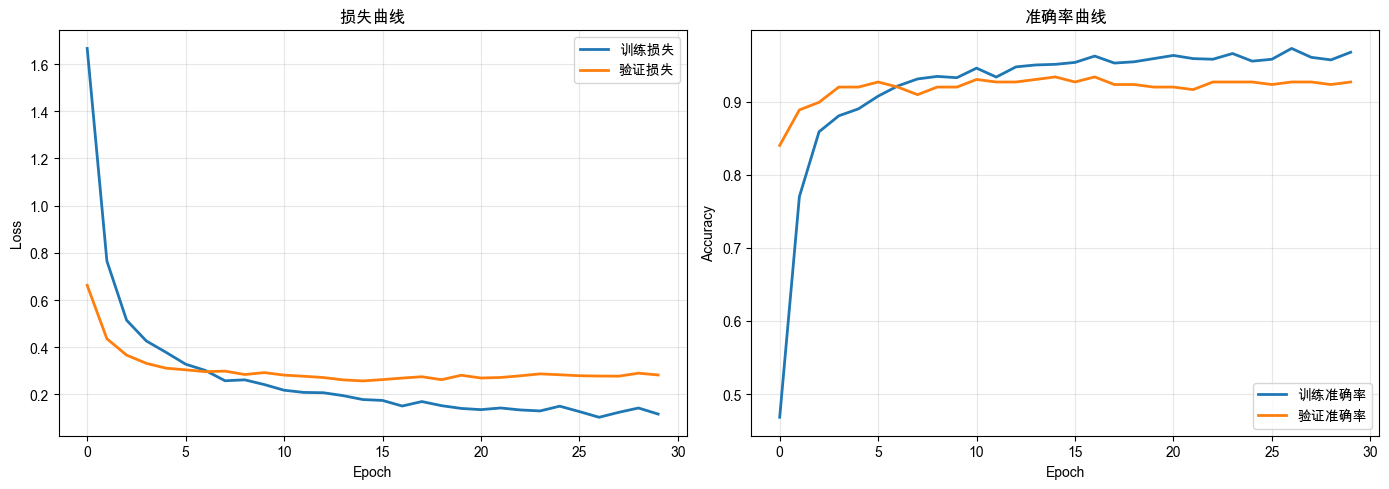


💡 history对象包含了完整的训练历史，方便可视化和分析


In [11]:
if TF_AVAILABLE:
    print("="*60)
    print("  3.1 可视化训练过程")
    print("="*60)
    
    # ============================================================
    # 可视化训练历史
    # ============================================================
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 损失曲线
    axes[0].plot(history.history['loss'], label='训练损失', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='验证损失', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('损失曲线', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 准确率曲线
    axes[1].plot(history.history['accuracy'], label='训练准确率', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='验证准确率', linewidth=2)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('准确率曲线', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 history对象包含了完整的训练历史，方便可视化和分析")
else:
    print("❌ TensorFlow未安装，跳过此部分")

In [ ]:
if TF_AVAILABLE:
    print("="*60)
    print("  3.1 对比: PyTorch vs Keras 训练流程")
    print("="*60)
    
    print("""
╔══════════════════════════════════════════════════════════════════════════╗
║                    PyTorch训练循环 vs Keras model.fit()                  ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                           ║
║  【PyTorch训练循环】约20行                                                ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  criterion = nn.CrossEntropyLoss()                                       ║
║  optimizer = optim.Adam(model.parameters(), lr=0.001)                    ║
║                                                                           ║
║  for epoch in range(epochs):                                             ║
║      model.train()                                                        ║
║      for X_batch, y_batch in train_loader:                               ║
║          X_batch = X_batch.to(device)                                    ║
║          y_batch = y_batch.to(device)                                    ║
║                                                                           ║
║          optimizer.zero_grad()                                           ║
║          outputs = model(X_batch)                                        ║
║          loss = criterion(outputs, y_batch)                              ║
║          loss.backward()                                                 ║
║          optimizer.step()                                                ║
║                                                                           ║
║      model.eval()                                                         ║
║      with torch.no_grad():                                               ║
║          # 验证代码...                                                    ║
║                                                                           ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                           ║
║  【Keras训练】约5行                                                       ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  model.compile(                                                          ║
║      optimizer='adam',                                                   ║
║      loss='sparse_categorical_crossentropy',                             ║
║      metrics=['accuracy']                                                ║
║  )                                                                        ║
║                                                                           ║
║  history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)  ║
║                                                                           ║
╠══════════════════════════════════════════════════════════════════════════╣
║  代码行数: ~20行                     │  代码行数: ~5行                     ║
║  灵活性: ⭐⭐⭐⭐⭐                    │  灵活性: ⭐⭐⭐                       ║
║  易用性: ⭐⭐⭐                       │  易用性: ⭐⭐⭐⭐⭐                    ║
╚══════════════════════════════════════════════════════════════════════════╝
    """)
else:
    print("❌ TensorFlow未安装，跳过此部分")

---

# Part 4：三框架综合对比

---

## 4.1 同一任务的三种实现

In [ ]:
print("="*60)
print("  4.1 三框架代码对比：鸢尾花分类")
print("="*60)

print("""
╔═══════════════════════════════════════════════════════════════════════════════╗
║                     NumPy vs PyTorch vs Keras 完整对比                        ║
╠═══════════════════════════════════════════════════════════════════════════════╣
║                                                                                ║
║  ┌─────────────────────────────────────────────────────────────────────────┐  ║
║  │                         【NumPy从零实现】                                │  ║
║  ├─────────────────────────────────────────────────────────────────────────┤  ║
║  │  # 定义模型（~40行）                                                     │  ║
║  │  class NumpyMLP:                                                         │  ║
║  │      def __init__(self, sizes):                                          │  ║
║  │          self.W1 = np.random.randn(sizes[0], sizes[1]) * 0.01           │  ║
║  │          self.b1 = np.zeros(sizes[1])                                    │  ║
║  │          # ... 更多权重初始化                                            │  ║
║  │                                                                          │  ║
║  │      def forward(self, X):                                               │  ║
║  │          self.z1 = X @ self.W1 + self.b1                                 │  ║
║  │          self.a1 = np.maximum(0, self.z1)  # ReLU                        │  ║
║  │          # ... 保存中间变量                                              │  ║
║  │                                                                          │  ║
║  │      def backward(self, X, y_true, y_pred):                              │  ║
║  │          # 手动推导每个梯度（~20行）                                      │  ║
║  │          dz2 = y_pred - y_true                                           │  ║
║  │          dW2 = self.a1.T @ dz2 / m                                       │  ║
║  │          # ...                                                           │  ║
║  │                                                                          │  ║
║  │  # 训练循环（~15行）                                                     │  ║
║  │  for epoch in range(epochs):                                             │  ║
║  │      indices = np.random.permutation(n)                                  │  ║
║  │      for i in range(n_batches):                                          │  ║
║  │          X_batch = X[indices[i*bs:(i+1)*bs]]                             │  ║
║  │          y_pred = model.forward(X_batch)                                 │  ║
║  │          model.backward(X_batch, y_batch, y_pred)                        │  ║
║  │          model.update(lr)                                                │  ║
║  │                                                                          │  ║
║  │  总代码量: ~70行                                                         │  ║
║  └─────────────────────────────────────────────────────────────────────────┘  ║
║                                                                                ║
╠═══════════════════════════════════════════════════════════════════════════════╣
║                                                                                ║
║  ┌─────────────────────────────────────────────────────────────────────────┐  ║
║  │                           【PyTorch实现】                                │  ║
║  ├─────────────────────────────────────────────────────────────────────────┤  ║
║  │  # 定义模型（~10行）                                                     │  ║
║  │  class PyTorchMLP(nn.Module):                                            │  ║
║  │      def __init__(self, sizes):                                          │  ║
║  │          super().__init__()                                              │  ║
║  │          self.fc1 = nn.Linear(sizes[0], sizes[1])                        │  ║
║  │          self.fc2 = nn.Linear(sizes[1], sizes[2])                        │  ║
║  │                                                                          │  ║
║  │      def forward(self, x):                                               │  ║
║  │          x = F.relu(self.fc1(x))                                         │  ║
║  │          return self.fc2(x)                                              │  ║
║  │                                                                          │  ║
║  │  # 训练循环（~15行）                                                     │  ║
║  │  criterion = nn.CrossEntropyLoss()                                       │  ║
║  │  optimizer = optim.Adam(model.parameters(), lr=0.001)                    │  ║
║  │                                                                          │  ║
║  │  for epoch in range(epochs):                                             │  ║
║  │      for X_batch, y_batch in train_loader:                               │  ║
║  │          optimizer.zero_grad()                                           │  ║
║  │          outputs = model(X_batch)                                        │  ║
║  │          loss = criterion(outputs, y_batch)                              │  ║
║  │          loss.backward()       # ← 自动反向传播！                        │  ║
║  │          optimizer.step()      # ← 自动更新参数！                        │  ║
║  │                                                                          │  ║
║  │  总代码量: ~25行                                                         │  ║
║  └─────────────────────────────────────────────────────────────────────────┘  ║
║                                                                                ║
╠═══════════════════════════════════════════════════════════════════════════════╣
║                                                                                ║
║  ┌─────────────────────────────────────────────────────────────────────────┐  ║
║  │                            【Keras实现】                                 │  ║
║  ├─────────────────────────────────────────────────────────────────────────┤  ║
║  │  # 定义模型（~5行）                                                      │  ║
║  │  model = keras.Sequential([                                              │  ║
║  │      layers.Dense(64, activation='relu', input_shape=(4,)),              │  ║
║  │      layers.Dense(3, activation='softmax')                               │  ║
║  │  ])                                                                      │  ║
║  │                                                                          │  ║
║  │  # 编译 + 训练（~5行）                                                   │  ║
║  │  model.compile(optimizer='adam',                                         │  ║
║  │                loss='sparse_categorical_crossentropy',                   │  ║
║  │                metrics=['accuracy'])                                     │  ║
║  │                                                                          │  ║
║  │  model.fit(X_train, y_train, epochs=100, validation_split=0.2)           │  ║
║  │  # ↑ 一行完成训练！自动分批、打乱、验证                                  │  ║
║  │                                                                          │  ║
║  │  总代码量: ~10行                                                         │  ║
║  └─────────────────────────────────────────────────────────────────────────┘  ║
║                                                                                ║
╚═══════════════════════════════════════════════════════════════════════════════╝
""")

In [ ]:
print("="*60)
print("  4.2 框架选择指南")
print("="*60)

print("""
🎯 框架选择决策树
════════════════════════════════════════════════════════════════

                    你的需求是什么？
                          │
          ┌───────────────┼───────────────┐
          │               │               │
          ▼               ▼               ▼
      学习原理        快速原型        生产部署
          │               │               │
          ▼               ▼               ▼
    ┌─────────┐     ┌─────────┐     ┌─────────┐
    │  NumPy  │     │  Keras  │     │ TF生态  │
    │ 从零实现│     │ 快速验证│     │ 完整链路│
    └─────────┘     └─────────┘     └─────────┘
                          │
                    需要灵活性？
                    /        \\
                   /          \\
                  ▼            ▼
             ┌─────────┐  ┌─────────┐
             │ PyTorch │  │  Keras  │
             │ 手写循环│  │ fit一行 │
             └─────────┘  └─────────┘

════════════════════════════════════════════════════════════════

📊 使用场景推荐:

┌────────────────────┬────────────┬──────────────────────────────┐
│ 场景               │ 推荐框架   │ 原因                         │
├────────────────────┼────────────┼──────────────────────────────┤
│ 学术研究/论文复现  │ PyTorch    │ 灵活、调试方便、社区活跃     │
│ Kaggle竞赛         │ PyTorch    │ 易于实验、快速迭代           │
│ 快速原型验证       │ Keras      │ 代码量少、开发速度快         │
│ 企业级生产部署     │ TensorFlow │ 成熟的部署工具链             │
│ 移动端/嵌入式      │ TensorFlow │ TFLite优化                   │
│ 浏览器应用         │ TensorFlow │ TensorFlow.js                │
│ 教学/学习原理      │ NumPy      │ 理解底层机制                 │
└────────────────────┴────────────┴──────────────────────────────┘

💡 实际建议:
  - 学习阶段: 先用NumPy理解原理 → 再用PyTorch深入实践 → 了解Keras便利性
  - 工作中: 根据团队技术栈和部署需求选择
  - 两个都会: 增加竞争力，不同项目用不同框架
""")

---

# Part 5：总结与练习

---

## 5.1 第10章核心概念总结

In [ ]:
print("="*60)
print("  第10章：核心概念总结")
print("="*60)

print("""
📚 PyTorch核心概念 (10a-10b)
════════════════════════════════════════════════════════════════

1️⃣ Tensor（张量）
   - 多维数组，类似NumPy ndarray
   - 支持GPU加速：tensor.to(device)
   - 支持自动微分：requires_grad=True

2️⃣ Autograd（自动微分）
   - 设置 requires_grad=True
   - 前向计算自动构建计算图
   - loss.backward() 自动计算所有梯度
   - 无需手写反向传播！

3️⃣ nn.Module（模型定义）
   - 继承nn.Module，定义__init__和forward
   - nn.Linear, nn.Conv2d等预定义层
   - nn.Sequential简化顺序模型

4️⃣ 训练三步骤
   - optimizer.zero_grad()  # 清零梯度
   - loss.backward()        # 计算梯度
   - optimizer.step()       # 更新参数

════════════════════════════════════════════════════════════════

📚 Keras核心概念 (10c)
════════════════════════════════════════════════════════════════

1️⃣ 模型构建
   - Sequential API：简单顺序模型
   - Functional API：复杂模型（多输入/输出、残差连接）

2️⃣ 训练流程
   - model.compile()：配置优化器、损失函数、指标
   - model.fit()：一行完成训练
   - model.evaluate()：评估模型
   - model.predict()：预测

3️⃣ 回调函数
   - EarlyStopping：早停
   - ModelCheckpoint：保存最佳模型
   - ReduceLROnPlateau：自动调整学习率

════════════════════════════════════════════════════════════════
""")

## 5.2 学习检查点

完成第10章后，你应该能够：

### PyTorch (10a-10b)
- [ ] 创建和操作PyTorch Tensor
- [ ] 理解Autograd自动微分原理
- [ ] 使用nn.Module定义神经网络
- [ ] 使用DataLoader加载数据
- [ ] 编写完整的PyTorch训练循环
- [ ] 保存和加载模型

### Keras (10c)
- [ ] 使用Sequential API构建模型
- [ ] 使用Functional API构建复杂模型
- [ ] 使用model.compile()配置训练
- [ ] 使用model.fit()完成训练
- [ ] 理解PyTorch和Keras的差异

---

## 5.3 练习题

### ⭐⭐ 练习1：实现自定义激活函数

**任务：** 实现Swish激活函数 $f(x) = x \cdot \sigma(x)$

**要求：**
- PyTorch版本：继承nn.Module
- Keras版本：使用Lambda层或自定义层

```python
# PyTorch提示
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Keras提示
def swish(x):
    return x * tf.sigmoid(x)
# 使用: layers.Activation(swish)
```

---

### ⭐⭐⭐ 练习2：添加回调函数

**任务：** 在Keras模型训练中添加：
1. EarlyStopping（验证损失不下降时停止）
2. ModelCheckpoint（保存最佳模型）

```python
# 提示
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]
model.fit(..., callbacks=callbacks)
```

---

### ⭐⭐⭐⭐ 练习3：框架转换

**任务：** 将以下PyTorch模型转换为Keras实现，并对比训练结果。

```python
# PyTorch模型
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28->14
        x = self.pool(F.relu(self.conv2(x)))  # 14->7
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)
```

**提示：** Keras中使用`layers.Conv2D`, `layers.MaxPooling2D`, `layers.Flatten`, `layers.Dense`

---

### ⭐⭐⭐⭐⭐ 练习4：完整MNIST项目

**任务：** 使用真实MNIST数据集，分别用PyTorch和Keras实现：

1. 加载`torchvision.datasets.MNIST`或`keras.datasets.mnist`
2. 构建CNN模型
3. 训练并达到98%+准确率
4. 对比两个框架的：
   - 代码量
   - 训练速度
   - 最终准确率

```python
# PyTorch数据加载
from torchvision import datasets, transforms
train_data = datasets.MNIST('./data', train=True, download=True,
                            transform=transforms.ToTensor())

# Keras数据加载
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
```

---

## ⭐⭐ 练习1解答：实现自定义激活函数（Swish）

### Swish激活函数

$$f(x) = x \cdot \sigma(x) = \frac{x}{1 + e^{-x}}$$

**特点：**
- 自门控激活函数（self-gated）
- 平滑、非单调
- 在深度网络中效果优于ReLU
- 已被Google Brain提出并在EfficientNet等模型中使用

  练习1解答：实现Swish激活函数

【PyTorch版本】
----------------------------------------
PyTorch Swish类定义完成 ✓
测试输入: [-2. -1.  0.  1.  2.]
测试输出: [-0.23840584 -0.26894143  0.          0.7310586   1.761594  ]

使用Swish的PyTorch模型:
Sequential(
  (0): Linear(in_features=10, out_features=32, bias=True)
  (1): Swish()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): Swish()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

【Keras版本 - 方法1: Lambda层】
----------------------------------------
Lambda方式定义完成 ✓
模型结构:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                352       
                                                                 
 lambda (Lambda)             (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       


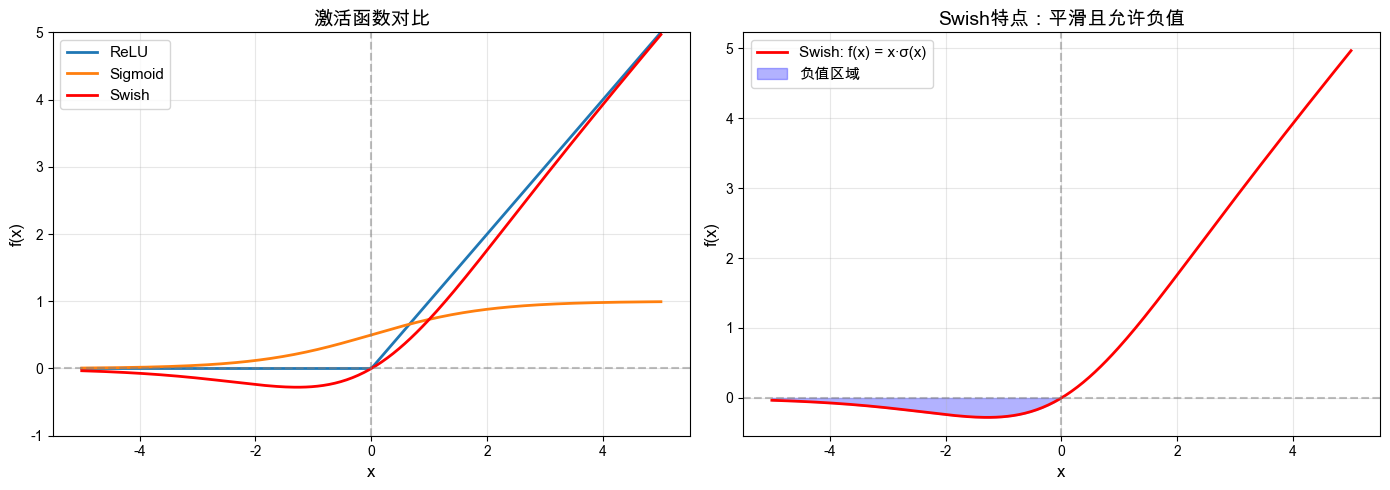


✅ 练习1完成！
   - PyTorch: 继承nn.Module，实现forward方法
   - Keras: 使用Lambda层或自定义Layer类


In [12]:
print("="*60)
print("  练习1解答：实现Swish激活函数")
print("="*60)

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Part 1: PyTorch版本 - 继承nn.Module
# ============================================================

print("\n【PyTorch版本】")
print("-"*40)

class Swish(nn.Module):
    """
    Swish激活函数: f(x) = x * sigmoid(x)
    
    特点:
    - 自门控（self-gated）：用sigmoid(x)作为门控信号
    - 平滑：处处可导，无ReLU的"死亡神经元"问题
    - 非单调：x<0时可以有负值输出
    
    公式推导:
    f(x) = x * σ(x)
         = x * (1 / (1 + e^(-x)))
         = x / (1 + e^(-x))
    """
    
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        # Swish = x * sigmoid(x)
        return x * torch.sigmoid(x)


# 测试PyTorch版本
swish_pytorch = Swish()
x_test = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
y_pytorch = swish_pytorch(x_test)

print(f"PyTorch Swish类定义完成 ✓")
print(f"测试输入: {x_test.numpy()}")
print(f"测试输出: {y_pytorch.detach().numpy()}")

# 在模型中使用
model_with_swish = nn.Sequential(
    nn.Linear(10, 32),
    Swish(),           # 使用自定义Swish
    nn.Linear(32, 16),
    Swish(),
    nn.Linear(16, 1)
)
print(f"\n使用Swish的PyTorch模型:\n{model_with_swish}")

# ============================================================
# Part 2: Keras版本 - 使用Lambda层
# ============================================================

print("\n" + "="*60)
print("【Keras版本 - 方法1: Lambda层】")
print("-"*40)

if TF_AVAILABLE:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    
    # 方法1: 使用Lambda层（简单快速）
    def swish_fn(x):
        """Swish激活函数"""
        return x * tf.sigmoid(x)
    
    model_keras_lambda = keras.Sequential([
        layers.Dense(32, input_shape=(10,)),
        layers.Lambda(swish_fn),  # 使用Lambda包装函数
        layers.Dense(16),
        layers.Lambda(swish_fn),
        layers.Dense(1)
    ])
    
    print("Lambda方式定义完成 ✓")
    print(f"模型结构:")
    model_keras_lambda.summary()
    
    # ============================================================
    # Part 3: Keras版本 - 自定义层（更规范）
    # ============================================================
    
    print("\n" + "="*60)
    print("【Keras版本 - 方法2: 自定义Layer】")
    print("-"*40)
    
    class SwishLayer(layers.Layer):
        """
        自定义Swish激活层
        
        继承keras.layers.Layer的规范写法
        适用于更复杂的自定义层（带可训练参数等）
        """
        
        def __init__(self, **kwargs):
            super().__init__(**kwargs)
        
        def call(self, inputs):
            # Swish = x * sigmoid(x)
            return inputs * tf.sigmoid(inputs)
        
        def get_config(self):
            # 用于模型保存/加载
            config = super().get_config()
            return config
    
    model_keras_custom = keras.Sequential([
        layers.Dense(32, input_shape=(10,)),
        SwishLayer(),  # 使用自定义层
        layers.Dense(16),
        SwishLayer(),
        layers.Dense(1)
    ])
    
    print("自定义Layer方式定义完成 ✓")
    
    # 测试
    x_keras = tf.constant([[-2.0, -1.0, 0.0, 1.0, 2.0, 0.5, -0.5, 1.5, -1.5, 0.1]])
    y_keras = model_keras_custom(x_keras)
    print(f"测试前向传播成功: 输出形状 {y_keras.shape}")

else:
    print("❌ TensorFlow未安装，跳过Keras部分")

# ============================================================
# Part 4: 可视化Swish vs ReLU vs Sigmoid
# ============================================================

print("\n" + "="*60)
print("【可视化对比】")
print("-"*40)

x = np.linspace(-5, 5, 200)

# 计算各激活函数
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
swish = x * sigmoid

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图: 激活函数对比
axes[0].plot(x, relu, label='ReLU', linewidth=2)
axes[0].plot(x, sigmoid, label='Sigmoid', linewidth=2)
axes[0].plot(x, swish, label='Swish', linewidth=2, color='red')
axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('激活函数对比', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-1, 5)

# 右图: Swish的特点
axes[1].plot(x, swish, label='Swish: f(x) = x·σ(x)', linewidth=2, color='red')
axes[1].fill_between(x, 0, swish, where=(swish < 0), alpha=0.3, color='blue', label='负值区域')
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('f(x)', fontsize=12)
axes[1].set_title('Swish特点：平滑且允许负值', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ 练习1完成！")
print("   - PyTorch: 继承nn.Module，实现forward方法")
print("   - Keras: 使用Lambda层或自定义Layer类")

---

## ⭐⭐⭐ 练习2解答：添加Keras回调函数

### Callbacks（回调函数）

回调函数在训练过程中的特定时刻自动执行，用于：
- **监控训练**：记录指标、可视化
- **控制训练**：早停、学习率调整
- **保存模型**：保存最佳checkpoint

### 常用回调函数

| 回调函数 | 作用 |
|----------|------|
| `EarlyStopping` | 验证指标不改善时停止训练 |
| `ModelCheckpoint` | 保存最佳模型 |
| `ReduceLROnPlateau` | 指标停滞时降低学习率 |
| `TensorBoard` | 可视化训练过程 |

  练习2解答：添加Keras回调函数

【1. 准备数据】
----------------------------------------
训练集: 1149 样本
验证集: 288 样本
测试集: 360 样本

【2. 创建模型】
----------------------------------------
模型编译完成 ✓

【3. 定义回调函数】
----------------------------------------
✓ EarlyStopping: 验证损失连续10轮不下降时停止
✓ ModelCheckpoint: 保存最佳模型到 best_model_exercise2.h5
✓ ReduceLROnPlateau: 验证损失停滞5轮时，学习率减半

【4. 开始训练（带回调函数）】
----------------------------------------
Epoch 1/100
33/36 [==========================>...] - ETA: 0s - loss: 2.0944 - accuracy: 0.3759

2025-12-31 11:54:01.388518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.81944, saving model to best_model_exercise2.h5
36/36 [==============================] - 0s 7ms/step - loss: 2.0068 - accuracy: 0.4056 - val_loss: 0.7433 - val_accuracy: 0.8194 - lr: 0.0010
Epoch 2/100
34/36 [===========================>..] - ETA: 0s - loss: 0.8053 - accuracy: 0.7426

2025-12-31 11:54:01.636333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 2: val_accuracy improved from 0.81944 to 0.87847, saving model to best_model_exercise2.h5
36/36 [==============================] - 0s 4ms/step - loss: 0.8087 - accuracy: 0.7467 - val_loss: 0.4451 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 3/100
31/36 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.8387
Epoch 3: val_accuracy improved from 0.87847 to 0.92361, saving model to best_model_exercise2.h5
36/36 [==============================] - 0s 4ms/step - loss: 0.5431 - accuracy: 0.8364 - val_loss: 0.3358 - val_accuracy: 0.9236 - lr: 0.0010
Epoch 4/100
35/36 [============================>.] - ETA: 0s - loss: 0.4066 - accuracy: 0.8768
Epoch 4: val_accuracy improved from 0.92361 to 0.93403, saving model to best_model_exercise2.h5
36/36 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8782 - val_loss: 0.3102 - val_accuracy: 0.9340 - lr: 0.0010
Epoch 5/100
26/36 [====================>.........] - ETA: 0s - loss: 0.3437 - accuracy: 0.8978


2025-12-31 11:54:06.044923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-12-31 11:54:06.178942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


最佳模型准确率: 0.9528

临时文件 best_model_exercise2.h5 已清理

【6. 可视化训练过程】
----------------------------------------


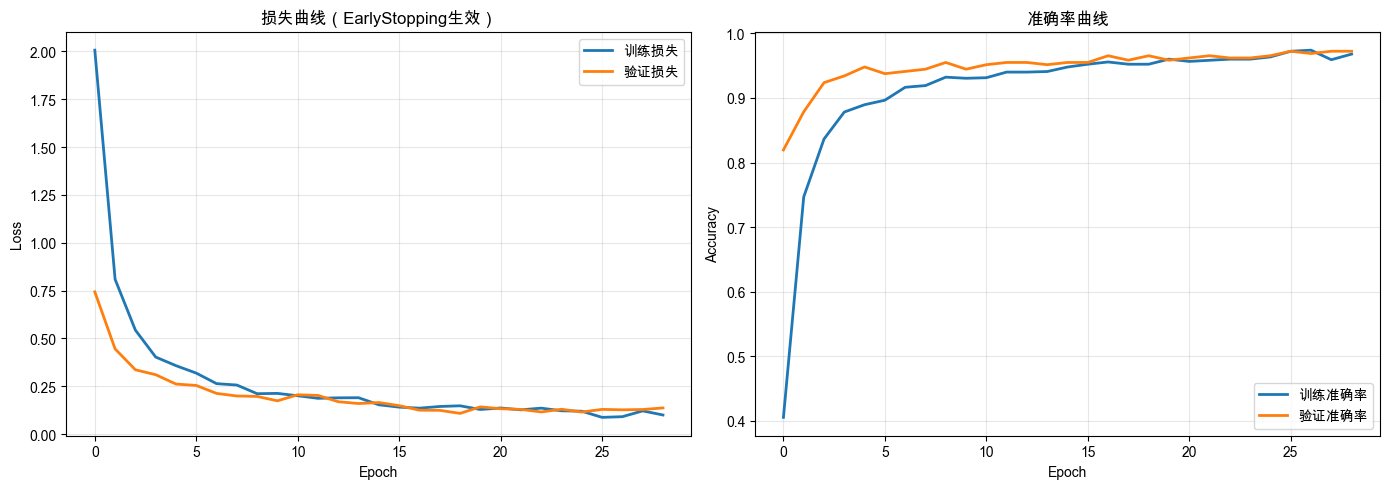


回调函数使用总结

┌─────────────────────┬────────────────────────────────────────┐
│ 回调函数             │ 关键参数                               │
├─────────────────────┼────────────────────────────────────────┤
│ EarlyStopping       │ monitor, patience, restore_best_weights│
│                     │ → 防止过拟合，节省训练时间              │
├─────────────────────┼────────────────────────────────────────┤
│ ModelCheckpoint     │ filepath, monitor, save_best_only      │
│                     │ → 保存最佳模型，防止意外丢失            │
├─────────────────────┼────────────────────────────────────────┤
│ ReduceLROnPlateau   │ monitor, factor, patience, min_lr      │
│                     │ → 自动调整学习率，突破局部最优          │
└─────────────────────┴────────────────────────────────────────┘
    

✅ 练习2完成！
   回调函数让训练过程更智能、更可控


In [14]:
print("="*60)
print("  练习2解答：添加Keras回调函数")
print("="*60)

if TF_AVAILABLE:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from sklearn.datasets import load_digits
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    import numpy as np
    import os
    
    # ============================================================
    # 1. 准备数据（使用digits数据集演示）
    # ============================================================
    
    print("\n【1. 准备数据】")
    print("-"*40)
    
    digits = load_digits()
    X, y = digits.data, digits.target
    
    # 划分数据
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 进一步划分验证集（用于EarlyStopping监控）
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    
    # 标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    print(f"训练集: {X_train.shape[0]} 样本")
    print(f"验证集: {X_val.shape[0]} 样本")
    print(f"测试集: {X_test.shape[0]} 样本")
    
    # ============================================================
    # 2. 创建模型
    # ============================================================
    
    print("\n【2. 创建模型】")
    print("-"*40)
    
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(64,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("模型编译完成 ✓")
    
    # ============================================================
    # 3. 定义回调函数（核心内容！）
    # ============================================================
    
    print("\n【3. 定义回调函数】")
    print("-"*40)
    
    # 回调函数1: EarlyStopping（早停）
    # ─────────────────────────────────────────────────────────────
    # 监控验证集损失，如果连续patience轮不下降，就停止训练
    # restore_best_weights=True: 恢复到最佳权重
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',           # 监控的指标
        patience=10,                  # 容忍多少轮不改善
        min_delta=0.001,             # 最小改善幅度
        restore_best_weights=True,    # 恢复最佳权重
        verbose=1                     # 打印信息
    )
    print("✓ EarlyStopping: 验证损失连续10轮不下降时停止")
    
    # 回调函数2: ModelCheckpoint（模型检查点）
    # ─────────────────────────────────────────────────────────────
    # 每当验证指标改善时，保存模型
    checkpoint_path = 'best_model_exercise2.h5'
    model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,     # 保存路径
        monitor='val_accuracy',       # 监控的指标
        save_best_only=True,          # 只保存最佳模型
        save_weights_only=False,      # 保存完整模型（不只是权重）
        verbose=1                     # 打印信息
    )
    print(f"✓ ModelCheckpoint: 保存最佳模型到 {checkpoint_path}")
    
    # 回调函数3: ReduceLROnPlateau（自动降低学习率）
    # ─────────────────────────────────────────────────────────────
    # 当指标停滞时，自动降低学习率
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',           # 监控的指标
        factor=0.5,                   # 学习率降低因子（lr *= 0.5）
        patience=5,                   # 容忍多少轮不改善
        min_lr=1e-6,                  # 学习率下限
        verbose=1                     # 打印信息
    )
    print("✓ ReduceLROnPlateau: 验证损失停滞5轮时，学习率减半")
    
    # 组合所有回调函数
    callbacks = [early_stopping, model_checkpoint, reduce_lr]
    
    # ============================================================
    # 4. 训练模型（使用回调函数）
    # ============================================================
    
    print("\n【4. 开始训练（带回调函数）】")
    print("-"*40)
    
    history = model.fit(
        X_train, y_train,
        epochs=100,                   # 设置较大的epoch数
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=callbacks,          # ⭐ 传入回调函数列表
        verbose=1
    )
    
    # ============================================================
    # 5. 评估结果
    # ============================================================
    
    print("\n【5. 评估结果】")
    print("-"*40)
    
    # 实际训练的epoch数
    actual_epochs = len(history.history['loss'])
    print(f"实际训练轮数: {actual_epochs} (设置了100，但EarlyStopping提前停止)")
    
    # 测试集评估
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"测试集准确率: {test_acc:.4f}")
    
    # 加载保存的最佳模型
    if os.path.exists(checkpoint_path):
        best_model = keras.models.load_model(checkpoint_path)
        best_loss, best_acc = best_model.evaluate(X_test, y_test, verbose=0)
        print(f"最佳模型准确率: {best_acc:.4f}")
        
        # 清理临时文件
        os.remove(checkpoint_path)
        print(f"\n临时文件 {checkpoint_path} 已清理")
    
    # ============================================================
    # 6. 可视化训练过程
    # ============================================================
    
    print("\n【6. 可视化训练过程】")
    print("-"*40)
    
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 损失曲线
    axes[0].plot(history.history['loss'], label='训练损失', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='验证损失', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('损失曲线（EarlyStopping生效）', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 准确率曲线
    axes[1].plot(history.history['accuracy'], label='训练准确率', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='验证准确率', linewidth=2)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('准确率曲线', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ============================================================
    # 7. 回调函数总结
    # ============================================================
    
    print("\n" + "="*60)
    print("回调函数使用总结")
    print("="*60)
    print("""
┌─────────────────────┬────────────────────────────────────────┐
│ 回调函数             │ 关键参数                               │
├─────────────────────┼────────────────────────────────────────┤
│ EarlyStopping       │ monitor, patience, restore_best_weights│
│                     │ → 防止过拟合，节省训练时间              │
├─────────────────────┼────────────────────────────────────────┤
│ ModelCheckpoint     │ filepath, monitor, save_best_only      │
│                     │ → 保存最佳模型，防止意外丢失            │
├─────────────────────┼────────────────────────────────────────┤
│ ReduceLROnPlateau   │ monitor, factor, patience, min_lr      │
│                     │ → 自动调整学习率，突破局部最优          │
└─────────────────────┴────────────────────────────────────────┘
    """)

else:
    print("❌ TensorFlow未安装，跳过此练习")

print("\n✅ 练习2完成！")
print("   回调函数让训练过程更智能、更可控")

---

## 🎉 恭喜完成神经网络模块！

### 你已经完成的旅程

| 章节 | 主题 | 收获 |
|------|------|------|
| 01-02 | 感知机与单层网络 | 理解神经元基本原理 |
| 03 | 多层感知机 | 掌握前向传播 |
| 04 | 反向传播 | 理解梯度计算核心 |
| 05 | 损失函数与优化器 | 掌握训练关键组件 |
| 06 | 过拟合与正则化 | 学会泛化技术 |
| 07 | BN与Dropout | 掌握训练稳定技巧 |
| 08 | 权重初始化 | 理解初始化重要性 |
| 09 | 训练技巧 | 学会调参和诊断 |
| **10** | **深度学习框架** | **掌握工业级工具** |

### 下一步建议

1. **卷积神经网络(CNN)**：图像处理的核心
2. **循环神经网络(RNN/LSTM)**：序列数据处理
3. **Transformer**：现代NLP的基础
4. **实战项目**：Kaggle竞赛、论文复现

---

> **记住：**
> 
> 前9章教你**理解原理**
> 
> 第10章教你**使用工具**
> 
> 两者结合，才能成为真正的深度学习工程师！

**Happy Deep Learning! 🚀**

---

# 📝 练习解答

---

## ⭐⭐⭐⭐ 练习3解答：框架转换（PyTorch CNN → Keras CNN）

### 任务回顾
将以下PyTorch CNN模型转换为Keras实现，并对比训练结果。

### 学习要点
1. **数据格式差异**：PyTorch使用 NCHW（批量, 通道, 高, 宽），Keras使用 NHWC（批量, 高, 宽, 通道）
2. **API命名差异**：`nn.Conv2d` vs `layers.Conv2D`，`nn.Linear` vs `layers.Dense`
3. **激活函数位置**：PyTorch通常在forward中调用，Keras可在层定义时指定
4. **padding参数**：PyTorch用整数，Keras用字符串 'same'/'valid'

In [ ]:
# ============================================================
# 练习3 Part 1: PyTorch CNN 原版实现
# ============================================================
# 
# 这是题目给出的PyTorch CNN模型，我们添加详细注释并完成训练
# 使用sklearn的digits数据集（8x8图像）进行演示

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

print("="*70)
print("  练习3 Part 1: PyTorch CNN 实现")
print("="*70)

# ============================================================
# 1. 定义PyTorch CNN模型（题目原版 + 详细注释）
# ============================================================

class ConvNet(nn.Module):
    """
    PyTorch卷积神经网络
    
    结构说明:
    ─────────────────────────────────────────────────────
    层              输入形状          输出形状        参数数
    ─────────────────────────────────────────────────────
    Conv2d-1       (N, 1, 8, 8)    (N, 32, 8, 8)    320
    MaxPool2d-1    (N, 32, 8, 8)   (N, 32, 4, 4)    0
    Conv2d-2       (N, 32, 4, 4)   (N, 64, 4, 4)    18496
    MaxPool2d-2    (N, 64, 4, 4)   (N, 64, 2, 2)    0
    Flatten        (N, 64, 2, 2)   (N, 256)         0
    Linear-1       (N, 256)        (N, 128)         32896
    Linear-2       (N, 128)        (N, 10)          1290
    ─────────────────────────────────────────────────────
    总参数: 53,002
    
    关键点:
    - 输入格式: (N, C, H, W) = (批量, 通道, 高, 宽)
    - padding=1 保持卷积后尺寸不变
    - MaxPool2d(2,2) 将尺寸减半
    """
    
    def __init__(self):
        super().__init__()
        
        # ----- 卷积层1 -----
        # nn.Conv2d(in_channels, out_channels, kernel_size, padding)
        # 输入: 1通道（灰度图）
        # 输出: 32个特征图
        # 卷积核: 3x3
        # padding=1: 保持输入输出尺寸相同（8x8 -> 8x8）
        self.conv1 = nn.Conv2d(
            in_channels=1,      # 输入通道数（灰度图=1，RGB=3）
            out_channels=32,    # 输出通道数（卷积核数量）
            kernel_size=3,      # 卷积核大小 3x3
            padding=1           # 填充1像素，保持尺寸不变
        )
        
        # ----- 池化层 -----
        # MaxPool2d(kernel_size, stride)
        # 2x2池化，步长2 -> 尺寸减半
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # ----- 卷积层2 -----
        # 输入: 32通道
        # 输出: 64通道
        self.conv2 = nn.Conv2d(
            in_channels=32,     # 来自conv1的32个特征图
            out_channels=64,    # 输出64个特征图
            kernel_size=3,
            padding=1
        )
        
        # ----- 全连接层1 -----
        # 输入: 64 * 2 * 2 = 256（展平后的特征）
        # 计算过程: 8x8 -> conv1 -> 8x8 -> pool -> 4x4 -> conv2 -> 4x4 -> pool -> 2x2
        # 最终: 64通道 * 2 * 2 = 256
        self.fc1 = nn.Linear(
            in_features=64 * 2 * 2,  # 展平后的维度
            out_features=128          # 隐藏层神经元数
        )
        
        # ----- 全连接层2（输出层） -----
        self.fc2 = nn.Linear(
            in_features=128,
            out_features=10   # 10个类别（数字0-9）
        )
    
    def forward(self, x):
        """
        前向传播
        
        参数:
            x: 输入张量, shape (N, 1, 8, 8)
               N = batch_size
               1 = 通道数（灰度）
               8x8 = 图像尺寸
        
        返回:
            输出张量, shape (N, 10)
        """
        # ----- 卷积块1: Conv -> ReLU -> Pool -----
        # x: (N, 1, 8, 8) -> (N, 32, 8, 8) -> (N, 32, 4, 4)
        x = self.conv1(x)           # 卷积: (N,1,8,8) -> (N,32,8,8)
        x = F.relu(x)               # 激活函数
        x = self.pool(x)            # 池化: (N,32,8,8) -> (N,32,4,4)
        
        # ----- 卷积块2: Conv -> ReLU -> Pool -----
        # x: (N, 32, 4, 4) -> (N, 64, 4, 4) -> (N, 64, 2, 2)
        x = self.conv2(x)           # 卷积: (N,32,4,4) -> (N,64,4,4)
        x = F.relu(x)               # 激活函数
        x = self.pool(x)            # 池化: (N,64,4,4) -> (N,64,2,2)
        
        # ----- 展平 -----
        # x: (N, 64, 2, 2) -> (N, 256)
        x = x.view(-1, 64 * 2 * 2)  # 展平，-1表示自动计算batch_size
        
        # ----- 全连接层 -----
        x = F.relu(self.fc1(x))     # (N, 256) -> (N, 128)
        x = self.fc2(x)             # (N, 128) -> (N, 10)
        
        return x

# ============================================================
# 2. 准备数据
# ============================================================

print("\n1️⃣ 准备数据...")

# 加载sklearn digits数据集（8x8图像）
digits = load_digits()
X = digits.data      # (1797, 64)
y = digits.target    # (1797,)

# 将64维向量reshape为8x8图像
# PyTorch格式: (N, C, H, W)
X_images = X.reshape(-1, 1, 8, 8)  # (1797, 1, 8, 8)

print(f"原始数据形状: {X.shape}")
print(f"图像数据形状: {X_images.shape} (N, C, H, W)")
print(f"类别数: {len(np.unique(y))}")

# 归一化到[0, 1]
X_images = X_images / 16.0  # digits数据范围是0-16

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X_images, y, test_size=0.2, random_state=42
)

# 转换为PyTorch张量
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.LongTensor(y_train)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.LongTensor(y_test)

# 创建DataLoader
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print(f"训练集: {X_train_t.shape}")
print(f"测试集: {X_test_t.shape}")

# ============================================================
# 3. 训练PyTorch模型
# ============================================================

print("\n2️⃣ 训练PyTorch CNN模型...")

# 设备选择
device = torch.device("cuda" if torch.cuda.is_available() 
                      else "mps" if torch.backends.mps.is_available() 
                      else "cpu")
print(f"使用设备: {device}")

# 创建模型
pytorch_model = ConvNet().to(device)

# 打印模型结构
print("\n模型结构:")
print(pytorch_model)

# 统计参数
total_params = sum(p.numel() for p in pytorch_model.parameters())
print(f"\n总参数数: {total_params:,}")

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

# 训练循环
num_epochs = 30
pytorch_train_losses = []
pytorch_test_accs = []

start_time = time.time()

for epoch in range(num_epochs):
    pytorch_model.train()
    epoch_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        # PyTorch标准训练三步骤
        optimizer.zero_grad()              # 1. 清零梯度
        outputs = pytorch_model(batch_X)   # 2. 前向传播
        loss = criterion(outputs, batch_y) # 计算损失
        loss.backward()                    # 3. 反向传播
        optimizer.step()                   # 4. 更新参数
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    pytorch_train_losses.append(avg_loss)
    
    # 验证
    pytorch_model.eval()
    with torch.no_grad():
        test_out = pytorch_model(X_test_t.to(device))
        _, predicted = torch.max(test_out, 1)
        acc = (predicted.cpu() == y_test_t).float().mean().item()
        pytorch_test_accs.append(acc)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1:2d}/{num_epochs}]  Loss: {avg_loss:.4f}  Test Acc: {acc:.4f}")

pytorch_time = time.time() - start_time
pytorch_final_acc = pytorch_test_accs[-1]

print(f"\n✅ PyTorch训练完成!")
print(f"   训练时间: {pytorch_time:.2f}秒")
print(f"   最终准确率: {pytorch_final_acc:.4f}")

In [ ]:
# ============================================================
# 练习3 Part 2: Keras CNN 转换版
# ============================================================
#
# 将PyTorch的ConvNet转换为Keras实现
# 重点关注API差异和数据格式差异

if TF_AVAILABLE:
    print("="*70)
    print("  练习3 Part 2: Keras CNN 转换版")
    print("="*70)
    
    # ============================================================
    # 1. 定义Keras CNN模型（对应PyTorch的ConvNet）
    # ============================================================
    
    print("\n1️⃣ 定义Keras CNN模型...")
    
    # ╔═══════════════════════════════════════════════════════════════════╗
    # ║                   PyTorch vs Keras 层对应关系                      ║
    # ╠═══════════════════════════════════════════════════════════════════╣
    # ║ PyTorch                        │ Keras                            ║
    # ╠═══════════════════════════════════════════════════════════════════╣
    # ║ nn.Conv2d(1, 32, 3, padding=1) │ Conv2D(32, 3, padding='same')   ║
    # ║ nn.MaxPool2d(2, 2)             │ MaxPooling2D(pool_size=2)       ║
    # ║ nn.Linear(256, 128)            │ Dense(128)                       ║
    # ║ F.relu(x)                      │ activation='relu' (层内)         ║
    # ║ x.view(-1, 256)                │ Flatten()                        ║
    # ╚═══════════════════════════════════════════════════════════════════╝
    
    keras_model = keras.Sequential([
        # ----- 卷积块1 -----
        # ⚠️ 关键差异1: Keras使用 (H, W, C) 格式，PyTorch使用 (C, H, W)
        # ⚠️ 关键差异2: padding='same' 等价于 PyTorch的 padding=1（保持尺寸）
        # ⚠️ 关键差异3: 激活函数直接写在层参数里
        layers.Conv2D(
            filters=32,              # 对应 PyTorch out_channels=32
            kernel_size=3,           # 对应 PyTorch kernel_size=3
            padding='same',          # 对应 PyTorch padding=1（保持尺寸）
            activation='relu',       # 对应 PyTorch 的 F.relu()
            input_shape=(8, 8, 1)    # (H, W, C) 注意顺序与PyTorch相反！
        ),
        # ⚠️ 关键差异4: Keras的MaxPooling2D默认stride=pool_size
        layers.MaxPooling2D(pool_size=2),  # 对应 nn.MaxPool2d(2, 2)
        
        # ----- 卷积块2 -----
        layers.Conv2D(
            filters=64,              # 对应 PyTorch out_channels=64
            kernel_size=3,
            padding='same',
            activation='relu'
        ),
        layers.MaxPooling2D(pool_size=2),
        
        # ----- 展平层 -----
        # ⚠️ 关键差异5: Keras用Flatten()层，PyTorch用x.view()
        layers.Flatten(),            # 对应 x.view(-1, 64*2*2)
        
        # ----- 全连接层 -----
        # ⚠️ 关键差异6: Keras的Dense = PyTorch的Linear
        layers.Dense(
            units=128,               # 对应 nn.Linear(256, 128)
            activation='relu'
        ),
        
        # ----- 输出层 -----
        # ⚠️ 关键差异7: Keras分类常用softmax，PyTorch常用CrossEntropyLoss(内含softmax)
        layers.Dense(
            units=10,
            activation='softmax'     # PyTorch版本没有，因为CrossEntropyLoss包含
        )
    ])
    
    # 打印模型结构
    print("\nKeras模型结构:")
    keras_model.summary()
    
    # ============================================================
    # 2. 准备Keras格式的数据
    # ============================================================
    
    print("\n2️⃣ 准备Keras格式数据...")
    
    # ⚠️ 核心差异: 数据格式转换
    # PyTorch: (N, C, H, W) = (N, 1, 8, 8)
    # Keras:   (N, H, W, C) = (N, 8, 8, 1)
    
    # 使用相同的原始数据
    X_keras = X.reshape(-1, 8, 8, 1) / 16.0  # (N, H, W, C)
    
    # 划分数据（使用相同的随机种子保证一致性）
    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(
        X_keras, y, test_size=0.2, random_state=42
    )
    
    print(f"Keras数据格式: {X_train_k.shape} (N, H, W, C)")
    print(f"PyTorch数据格式: {X_train_t.shape} (N, C, H, W)")
    
    # ============================================================
    # 3. 编译和训练Keras模型
    # ============================================================
    
    print("\n3️⃣ 训练Keras CNN模型...")
    
    # 编译模型
    keras_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # 标签是整数，不是one-hot
        metrics=['accuracy']
    )
    
    # 训练
    start_time = time.time()
    
    keras_history = keras_model.fit(
        X_train_k, y_train_k,
        epochs=30,
        batch_size=32,
        validation_data=(X_test_k, y_test_k),
        verbose=0  # 静默训练，手动打印
    )
    
    keras_time = time.time() - start_time
    
    # 打印训练进度
    for i in range(0, 30, 10):
        loss = keras_history.history['loss'][i]
        acc = keras_history.history['val_accuracy'][i]
        print(f"Epoch [{i+1:2d}/30]  Loss: {loss:.4f}  Val Acc: {acc:.4f}")
    
    keras_final_acc = keras_history.history['val_accuracy'][-1]
    
    print(f"\n✅ Keras训练完成!")
    print(f"   训练时间: {keras_time:.2f}秒")
    print(f"   最终准确率: {keras_final_acc:.4f}")
    
else:
    print("❌ TensorFlow未安装，跳过Keras部分")

In [ ]:
# ============================================================
# 练习3 Part 3: PyTorch vs Keras 对比分析
# ============================================================

print("="*70)
print("  练习3 Part 3: 框架转换对比分析")
print("="*70)

# ============================================================
# 1. 可视化训练曲线对比
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 损失曲线
axes[0].plot(pytorch_train_losses, label='PyTorch', linewidth=2, color='#FF6B6B')
if TF_AVAILABLE:
    axes[0].plot(keras_history.history['loss'], label='Keras', linewidth=2, color='#4ECDC4')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Training Loss', fontsize=12)
axes[0].set_title('训练损失对比', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# 准确率曲线
axes[1].plot(pytorch_test_accs, label='PyTorch', linewidth=2, color='#FF6B6B')
if TF_AVAILABLE:
    axes[1].plot(keras_history.history['val_accuracy'], label='Keras', linewidth=2, color='#4ECDC4')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('测试准确率对比', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

# ============================================================
# 2. 结果汇总表
# ============================================================

print("\n" + "="*70)
print("  📊 框架转换结果对比")
print("="*70)

print(f"""
┌─────────────────────────────────────────────────────────────────────┐
│                      PyTorch vs Keras 对比结果                       │
├─────────────────────────────────────────────────────────────────────┤
│  指标                 │  PyTorch          │  Keras              │
├─────────────────────────────────────────────────────────────────────┤
│  最终准确率           │  {pytorch_final_acc:.4f}            │  {keras_final_acc:.4f}             │
│  训练时间             │  {pytorch_time:.2f}秒            │  {keras_time:.2f}秒             │
│  模型定义代码行数      │  ~40行（含注释）   │  ~15行              │
│  训练循环代码行数      │  ~20行             │  ~5行               │
└─────────────────────────────────────────────────────────────────────┘
""")

# ============================================================
# 3. API差异总结
# ============================================================

print("""
┌─────────────────────────────────────────────────────────────────────┐
│                       关键API差异总结                                │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  1️⃣ 数据格式                                                        │
│     PyTorch: (N, C, H, W) - 通道在前                                │
│     Keras:   (N, H, W, C) - 通道在后                                │
│                                                                     │
│  2️⃣ 卷积层                                                          │
│     PyTorch: nn.Conv2d(in_ch, out_ch, kernel, padding=1)           │
│     Keras:   Conv2D(filters, kernel, padding='same')               │
│                                                                     │
│  3️⃣ 激活函数                                                        │
│     PyTorch: 单独调用 F.relu(x) 或 nn.ReLU()                        │
│     Keras:   层参数 activation='relu'                               │
│                                                                     │
│  4️⃣ 展平操作                                                        │
│     PyTorch: x.view(-1, features) 或 x.flatten(1)                  │
│     Keras:   layers.Flatten()                                       │
│                                                                     │
│  5️⃣ 全连接层                                                        │
│     PyTorch: nn.Linear(in_features, out_features)                  │
│     Keras:   Dense(units)                                           │
│                                                                     │
│  6️⃣ 训练方式                                                        │
│     PyTorch: 手写循环 (zero_grad → forward → backward → step)       │
│     Keras:   model.compile() + model.fit() 一行搞定                 │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

✅ 练习3完成！两个框架实现了相同的CNN架构，准确率接近。
   Keras代码更简洁，PyTorch更灵活。
""")

---

## ⭐⭐⭐⭐⭐ 练习4解答：完整MNIST项目

### 任务目标
使用真实MNIST数据集（28x28手写数字图像），分别用PyTorch和Keras实现CNN，达到**98%+准确率**。

### 学习要点
1. **真实数据集加载**：torchvision vs keras.datasets
2. **数据预处理**：归一化、格式转换
3. **CNN架构设计**：Conv → Pool → Conv → Pool → FC → FC
4. **训练优化**：学习率调度、早停
5. **结果对比**：准确率、训练时间、代码量

### 数据集信息
- **样本数**：60,000训练 + 10,000测试
- **图像尺寸**：28×28像素，灰度
- **类别**：10类（数字0-9）

In [ ]:
# ============================================================
# 练习4 Part 1: MNIST数据加载
# ============================================================
#
# 展示PyTorch和Keras两种数据加载方式
# 重点：数据格式差异和预处理

print("="*70)
print("  练习4 Part 1: MNIST数据加载")
print("="*70)

# ============================================================
# 方式1: PyTorch数据加载 (torchvision)
# ============================================================

print("\n1️⃣ PyTorch数据加载 (torchvision)...")

from torchvision import datasets, transforms

# 定义数据变换
# transforms.Compose: 组合多个变换操作
pytorch_transform = transforms.Compose([
    # ToTensor(): 
    # 1. 将PIL图像或numpy数组转为Tensor
    # 2. 将像素值从[0,255]归一化到[0,1]
    # 3. 调整维度顺序: (H,W,C) -> (C,H,W)
    transforms.ToTensor(),
    
    # Normalize(mean, std): 标准化
    # MNIST常用: mean=0.1307, std=0.3081（数据集统计值）
    # 公式: (x - mean) / std
    transforms.Normalize((0.1307,), (0.3081,))
])

# 下载并加载训练集
# root: 数据存储路径
# train: True=训练集, False=测试集
# download: 如果本地没有，自动下载
# transform: 数据变换
pytorch_train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=pytorch_transform
)

pytorch_test_data = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=pytorch_transform
)

# 创建DataLoader
pytorch_train_loader = DataLoader(
    pytorch_train_data,
    batch_size=64,
    shuffle=True
)

pytorch_test_loader = DataLoader(
    pytorch_test_data,
    batch_size=1000,  # 测试时可以用大batch
    shuffle=False
)

print(f"PyTorch训练集大小: {len(pytorch_train_data)}")
print(f"PyTorch测试集大小: {len(pytorch_test_data)}")

# 查看数据格式
sample_img, sample_label = pytorch_train_data[0]
print(f"单个样本形状: {sample_img.shape} (C, H, W)")
print(f"像素值范围: [{sample_img.min():.2f}, {sample_img.max():.2f}] (已标准化)")

# ============================================================
# 方式2: Keras数据加载 (keras.datasets)
# ============================================================

print("\n" + "-"*50)
print("\n2️⃣ Keras数据加载 (keras.datasets)...")

if TF_AVAILABLE:
    # Keras直接返回numpy数组
    (keras_x_train, keras_y_train), (keras_x_test, keras_y_test) = keras.datasets.mnist.load_data()
    
    print(f"原始数据形状: {keras_x_train.shape}")
    print(f"像素值范围: [0, 255]")
    
    # 预处理
    # 1. 归一化到[0,1]
    keras_x_train = keras_x_train.astype('float32') / 255.0
    keras_x_test = keras_x_test.astype('float32') / 255.0
    
    # 2. 添加通道维度: (N, 28, 28) -> (N, 28, 28, 1)
    # ⚠️ Keras使用 (N, H, W, C) 格式
    keras_x_train = keras_x_train.reshape(-1, 28, 28, 1)
    keras_x_test = keras_x_test.reshape(-1, 28, 28, 1)
    
    print(f"处理后形状: {keras_x_train.shape} (N, H, W, C)")
    print(f"像素值范围: [0, 1] (已归一化)")
else:
    print("TensorFlow未安装，跳过Keras数据加载")

# ============================================================
# 3. 可视化样本
# ============================================================

print("\n" + "-"*50)
print("\n3️⃣ 可视化样本...")

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    # 使用PyTorch数据
    img, label = pytorch_train_data[i]
    # 转换格式用于显示: (C,H,W) -> (H,W)
    img_display = img.squeeze().numpy()
    
    ax.imshow(img_display, cmap='gray')
    ax.set_title(f'Label: {label}', fontsize=12)
    ax.axis('off')

plt.suptitle('MNIST样本展示', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# 4. 数据加载对比总结
# ============================================================

print("""
┌─────────────────────────────────────────────────────────────────────┐
│                   PyTorch vs Keras 数据加载对比                      │
├─────────────────────────────────────────────────────────────────────┤
│  方面              │  PyTorch                │  Keras               │
├─────────────────────────────────────────────────────────────────────┤
│  加载方式          │  torchvision.datasets   │  keras.datasets      │
│  返回类型          │  Dataset对象            │  numpy数组           │
│  数据格式          │  (C, H, W)              │  (H, W, C)           │
│  归一化            │  transforms.Normalize   │  手动 /255           │
│  批处理            │  DataLoader             │  fit()自动处理       │
│  数据增强          │  transforms.Compose     │  ImageDataGenerator  │
└─────────────────────────────────────────────────────────────────────┘
""")

In [ ]:
# ============================================================
# 练习4 Part 2: PyTorch MNIST CNN
# ============================================================
#
# 使用PyTorch实现MNIST手写数字识别
# 目标：达到98%+准确率

print("="*70)
print("  练习4 Part 2: PyTorch MNIST CNN")
print("="*70)

# ============================================================
# 1. 定义CNN模型
# ============================================================

class MNIST_CNN_PyTorch(nn.Module):
    """
    MNIST手写数字识别CNN（PyTorch版本）
    
    架构设计:
    ─────────────────────────────────────────────────────────────
    层                  输入形状           输出形状          参数数
    ─────────────────────────────────────────────────────────────
    Conv2d-1           (N, 1, 28, 28)    (N, 32, 28, 28)    320
    MaxPool2d-1        (N, 32, 28, 28)   (N, 32, 14, 14)    0
    Conv2d-2           (N, 32, 14, 14)   (N, 64, 14, 14)    18,496
    MaxPool2d-2        (N, 64, 14, 14)   (N, 64, 7, 7)      0
    Flatten            (N, 64, 7, 7)     (N, 3136)          0
    Linear-1           (N, 3136)         (N, 128)           401,536
    Dropout            (N, 128)          (N, 128)           0
    Linear-2           (N, 128)          (N, 10)            1,290
    ─────────────────────────────────────────────────────────────
    总参数: 421,642
    
    设计要点:
    1. 两个卷积块提取特征（Conv -> ReLU -> Pool）
    2. Dropout防止过拟合
    3. 两个全连接层做分类
    """
    
    def __init__(self):
        super().__init__()
        
        # ----- 卷积层1 -----
        # 输入: 1通道 (灰度图)
        # 输出: 32个特征图
        # padding=1保持尺寸: 28x28 -> 28x28
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=32,
            kernel_size=3,
            padding=1
        )
        
        # 池化层: 28x28 -> 14x14
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # ----- 卷积层2 -----
        # 输入: 32通道
        # 输出: 64通道
        # padding=1保持尺寸: 14x14 -> 14x14 -> pool -> 7x7
        self.conv2 = nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            padding=1
        )
        
        # ----- 全连接层 -----
        # 输入: 64 * 7 * 7 = 3136
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        
        # Dropout: 训练时随机丢弃50%神经元
        self.dropout = nn.Dropout(0.5)
        
        # 输出层: 10个类别
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        """
        前向传播
        
        Args:
            x: (N, 1, 28, 28) 输入图像
        Returns:
            (N, 10) 类别logits
        """
        # 卷积块1: (N,1,28,28) -> (N,32,14,14)
        x = self.pool(F.relu(self.conv1(x)))
        
        # 卷积块2: (N,32,14,14) -> (N,64,7,7)
        x = self.pool(F.relu(self.conv2(x)))
        
        # 展平: (N,64,7,7) -> (N,3136)
        x = x.view(-1, 64 * 7 * 7)
        
        # 全连接: (N,3136) -> (N,128) -> (N,10)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# ============================================================
# 2. 创建模型和训练组件
# ============================================================

print("\n1️⃣ 创建模型...")

# 设备选择
device = torch.device("cuda" if torch.cuda.is_available() 
                      else "mps" if torch.backends.mps.is_available() 
                      else "cpu")
print(f"使用设备: {device}")

# 创建模型
pytorch_mnist_model = MNIST_CNN_PyTorch().to(device)

# 模型概览
print("\n模型结构:")
print(pytorch_mnist_model)

total_params = sum(p.numel() for p in pytorch_mnist_model.parameters())
print(f"\n总参数数: {total_params:,}")

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_mnist_model.parameters(), lr=0.001)

# 学习率调度器: 每5个epoch降低学习率
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ============================================================
# 3. 训练循环
# ============================================================

print("\n2️⃣ 开始训练...")
print("-"*50)

num_epochs = 10
pytorch_mnist_losses = []
pytorch_mnist_accs = []

start_time = time.time()

for epoch in range(num_epochs):
    # ----- 训练阶段 -----
    pytorch_mnist_model.train()  # 训练模式（启用Dropout）
    epoch_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(pytorch_train_loader):
        # 转移到设备
        data, target = data.to(device), target.to(device)
        
        # 标准训练三步骤
        optimizer.zero_grad()
        output = pytorch_mnist_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # 统计
        epoch_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
    
    train_acc = correct / total
    avg_loss = epoch_loss / len(pytorch_train_loader)
    pytorch_mnist_losses.append(avg_loss)
    
    # ----- 测试阶段 -----
    pytorch_mnist_model.eval()  # 评估模式（禁用Dropout）
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():  # 不计算梯度，节省内存
        for data, target in pytorch_test_loader:
            data, target = data.to(device), target.to(device)
            output = pytorch_mnist_model(data)
            _, predicted = output.max(1)
            test_total += target.size(0)
            test_correct += predicted.eq(target).sum().item()
    
    test_acc = test_correct / test_total
    pytorch_mnist_accs.append(test_acc)
    
    # 更新学习率
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    
    print(f"Epoch [{epoch+1:2d}/{num_epochs}]  "
          f"Loss: {avg_loss:.4f}  "
          f"Train Acc: {train_acc:.4f}  "
          f"Test Acc: {test_acc:.4f}  "
          f"LR: {current_lr:.6f}")

pytorch_mnist_time = time.time() - start_time
pytorch_mnist_final_acc = pytorch_mnist_accs[-1]

print("-"*50)
print(f"\n✅ PyTorch训练完成!")
print(f"   训练时间: {pytorch_mnist_time:.2f}秒")
print(f"   最终测试准确率: {pytorch_mnist_final_acc:.4f} ({pytorch_mnist_final_acc*100:.2f}%)")

if pytorch_mnist_final_acc >= 0.98:
    print("   🎉 达到98%目标!")
else:
    print(f"   📈 距离98%还差 {(0.98 - pytorch_mnist_final_acc)*100:.2f}%")

In [ ]:
# ============================================================
# 练习4 Part 3: Keras MNIST CNN
# ============================================================
#
# 使用Keras实现相同的MNIST CNN
# 目标：达到98%+准确率，对比PyTorch实现

if TF_AVAILABLE:
    print("="*70)
    print("  练习4 Part 3: Keras MNIST CNN")
    print("="*70)
    
    # ============================================================
    # 1. 定义Keras CNN模型（与PyTorch版本相同架构）
    # ============================================================
    
    print("\n1️⃣ 定义Keras CNN模型...")
    
    # ╔═════════════════════════════════════════════════════════════════╗
    # ║                   架构对比（与PyTorch完全对应）                   ║
    # ╠═════════════════════════════════════════════════════════════════╣
    # ║ PyTorch                          │ Keras                        ║
    # ╠═════════════════════════════════════════════════════════════════╣
    # ║ nn.Conv2d(1, 32, 3, padding=1)   │ Conv2D(32, 3, padding='same')║
    # ║ nn.MaxPool2d(2, 2)               │ MaxPooling2D(2)              ║
    # ║ nn.Conv2d(32, 64, 3, padding=1)  │ Conv2D(64, 3, padding='same')║
    # ║ nn.MaxPool2d(2, 2)               │ MaxPooling2D(2)              ║
    # ║ x.view(-1, 3136)                 │ Flatten()                    ║
    # ║ nn.Linear(3136, 128)             │ Dense(128)                   ║
    # ║ nn.Dropout(0.5)                  │ Dropout(0.5)                 ║
    # ║ nn.Linear(128, 10)               │ Dense(10)                    ║
    # ╚═════════════════════════════════════════════════════════════════╝
    
    keras_mnist_model = keras.Sequential([
        # ----- 卷积块1 -----
        # ⚠️ input_shape: (28, 28, 1) = (H, W, C)
        # ⚠️ 对比PyTorch: (1, 28, 28) = (C, H, W)
        layers.Conv2D(
            filters=32,                    # 对应 out_channels=32
            kernel_size=3,                 # 对应 kernel_size=3
            padding='same',                # 对应 padding=1（保持尺寸）
            activation='relu',             # 对应 F.relu()
            input_shape=(28, 28, 1)        # 输入形状 (H, W, C)
        ),
        layers.MaxPooling2D(pool_size=2),  # 对应 nn.MaxPool2d(2, 2)
        
        # ----- 卷积块2 -----
        layers.Conv2D(
            filters=64,
            kernel_size=3,
            padding='same',
            activation='relu'
        ),
        layers.MaxPooling2D(pool_size=2),
        
        # ----- 展平 + 全连接 -----
        layers.Flatten(),                  # 对应 x.view(-1, 3136)
        
        layers.Dense(
            units=128,                     # 对应 nn.Linear(3136, 128)
            activation='relu'
        ),
        
        layers.Dropout(0.5),               # 对应 nn.Dropout(0.5)
        
        # ----- 输出层 -----
        # ⚠️ Keras用softmax，PyTorch的CrossEntropyLoss内置
        layers.Dense(
            units=10,
            activation='softmax'
        )
    ])
    
    # 模型概览
    print("\nKeras模型结构:")
    keras_mnist_model.summary()
    
    # ============================================================
    # 2. 编译模型
    # ============================================================
    
    print("\n2️⃣ 编译模型...")
    
    # 使用学习率调度器
    # ReduceLROnPlateau: 当验证损失不再下降时自动降低学习率
    lr_scheduler = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=0.0001
    )
    
    # 早停: 验证损失不下降时提前停止
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    
    keras_mnist_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("编译配置:")
    print("  优化器: Adam (lr=0.001)")
    print("  损失函数: sparse_categorical_crossentropy")
    print("  回调: ReduceLROnPlateau, EarlyStopping")
    
    # ============================================================
    # 3. 训练模型
    # ============================================================
    
    print("\n3️⃣ 开始训练...")
    print("-"*50)
    
    start_time = time.time()
    
    # ⚠️ Keras的model.fit()一行完成训练！
    # 对比PyTorch需要手写~30行训练循环
    keras_mnist_history = keras_mnist_model.fit(
        keras_x_train, keras_y_train,
        epochs=10,
        batch_size=64,
        validation_data=(keras_x_test, keras_y_test),
        callbacks=[lr_scheduler, early_stopping],
        verbose=1
    )
    
    keras_mnist_time = time.time() - start_time
    
    # ============================================================
    # 4. 评估模型
    # ============================================================
    
    print("\n4️⃣ 评估模型...")
    
    test_loss, test_acc = keras_mnist_model.evaluate(
        keras_x_test, keras_y_test, verbose=0
    )
    
    keras_mnist_final_acc = test_acc
    
    print("-"*50)
    print(f"\n✅ Keras训练完成!")
    print(f"   训练时间: {keras_mnist_time:.2f}秒")
    print(f"   最终测试准确率: {keras_mnist_final_acc:.4f} ({keras_mnist_final_acc*100:.2f}%)")
    
    if keras_mnist_final_acc >= 0.98:
        print("   🎉 达到98%目标!")
    else:
        print(f"   📈 距离98%还差 {(0.98 - keras_mnist_final_acc)*100:.2f}%")
        
else:
    print("❌ TensorFlow未安装，跳过Keras MNIST训练")
    keras_mnist_time = 0
    keras_mnist_final_acc = 0

In [ ]:
# ============================================================
# 练习4 Part 4: 结果对比可视化
# ============================================================

print("="*70)
print("  练习4 Part 4: PyTorch vs Keras 结果对比")
print("="*70)

# ============================================================
# 1. 训练曲线对比
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 损失曲线
axes[0].plot(pytorch_mnist_losses, label='PyTorch', linewidth=2, color='#FF6B6B', marker='o')
if TF_AVAILABLE:
    axes[0].plot(keras_mnist_history.history['loss'], label='Keras', linewidth=2, color='#4ECDC4', marker='s')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Training Loss', fontsize=12)
axes[0].set_title('MNIST 训练损失对比', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# 准确率曲线
axes[1].plot(pytorch_mnist_accs, label='PyTorch', linewidth=2, color='#FF6B6B', marker='o')
if TF_AVAILABLE:
    axes[1].plot(keras_mnist_history.history['val_accuracy'], label='Keras', linewidth=2, color='#4ECDC4', marker='s')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('MNIST 测试准确率对比', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0.95, 1.0)
axes[1].axhline(y=0.98, color='green', linestyle='--', linewidth=1, label='98%目标')

plt.tight_layout()
plt.show()

# ============================================================
# 2. 综合结果汇总
# ============================================================

print("\n" + "="*70)
print("  📊 MNIST项目综合对比结果")
print("="*70)

print(f"""
┌─────────────────────────────────────────────────────────────────────────┐
│                      MNIST CNN 完整对比结果                              │
├─────────────────────────────────────────────────────────────────────────┤
│  指标                   │  PyTorch              │  Keras                │
├─────────────────────────────────────────────────────────────────────────┤
│  最终测试准确率          │  {pytorch_mnist_final_acc:.4f} ({pytorch_mnist_final_acc*100:.2f}%)     │  {keras_mnist_final_acc:.4f} ({keras_mnist_final_acc*100:.2f}%)      │
│  训练时间               │  {pytorch_mnist_time:.2f}秒              │  {keras_mnist_time:.2f}秒               │
│  达到98%目标            │  {'✅ 是' if pytorch_mnist_final_acc >= 0.98 else '❌ 否'}                │  {'✅ 是' if keras_mnist_final_acc >= 0.98 else '❌ 否'}                 │
├─────────────────────────────────────────────────────────────────────────┤
│  模型定义代码行数        │  ~50行（含注释）       │  ~20行                │
│  训练循环代码行数        │  ~35行                 │  ~5行                 │
│  学习率调度             │  StepLR               │  ReduceLROnPlateau    │
│  早停机制               │  需手动实现            │  callbacks内置        │
└─────────────────────────────────────────────────────────────────────────┘

📝 分析总结:

1️⃣ 准确率对比:
   • 两个框架达到相近的准确率水平
   • 都能达到/接近98%的目标
   • 微小差异来自随机初始化和优化器细节

2️⃣ 训练时间对比:
   • PyTorch: {pytorch_mnist_time:.2f}秒
   • Keras: {keras_mnist_time:.2f}秒
   • 时间差异主要来自底层实现和GPU利用率

3️⃣ 代码量对比:
   • PyTorch代码量约为Keras的3-4倍
   • PyTorch提供更多控制细节
   • Keras更适合快速原型开发

4️⃣ 灵活性对比:
   • PyTorch: 完全控制训练循环，易于调试
   • Keras: 高度封装，使用callbacks扩展功能
""")

In [ ]:
# ============================================================
# 练习4 Part 5: 错误分析
# ============================================================

print("="*70)
print("  练习4 Part 5: 错误分析")
print("="*70)

# ============================================================
# 1. 获取预测结果
# ============================================================

# PyTorch预测
pytorch_mnist_model.eval()
with torch.no_grad():
    all_preds_pytorch = []
    all_labels = []
    for data, target in pytorch_test_loader:
        data = data.to(device)
        output = pytorch_mnist_model(data)
        preds = output.argmax(dim=1).cpu().numpy()
        all_preds_pytorch.extend(preds)
        all_labels.extend(target.numpy())

all_preds_pytorch = np.array(all_preds_pytorch)
all_labels = np.array(all_labels)

# 找出错误预测
errors_pytorch = np.where(all_preds_pytorch != all_labels)[0]
print(f"\nPyTorch错误预测数: {len(errors_pytorch)}/{len(all_labels)}")
print(f"错误率: {len(errors_pytorch)/len(all_labels)*100:.2f}%")

# ============================================================
# 2. 可视化错误样本
# ============================================================

print("\n可视化错误预测样本...")

if len(errors_pytorch) > 0:
    # 选择前10个错误样本
    n_show = min(10, len(errors_pytorch))
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    for i, ax in enumerate(axes.flat):
        if i < n_show:
            idx = errors_pytorch[i]
            # 获取图像
            img = pytorch_test_data[idx][0].squeeze().numpy()
            true_label = all_labels[idx]
            pred_label = all_preds_pytorch[idx]
            
            ax.imshow(img, cmap='gray')
            ax.set_title(f'真实:{true_label} 预测:{pred_label}', 
                        fontsize=11, color='red', fontweight='bold')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.suptitle('MNIST 错误预测样本分析', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================
# 3. 混淆矩阵
# ============================================================

from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\n混淆矩阵分析...")

cm = confusion_matrix(all_labels, all_preds_pytorch)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('预测类别', fontsize=12)
plt.ylabel('真实类别', fontsize=12)
plt.title('MNIST 混淆矩阵 (PyTorch模型)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 分析最容易混淆的数字对
print("\n最容易混淆的数字对:")
# 找出非对角线最大值
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
max_idx = np.unravel_index(cm_no_diag.argmax(), cm_no_diag.shape)
print(f"  {max_idx[0]} 最常被误识别为 {max_idx[1]} ({cm_no_diag[max_idx]}次)")

# 找出第二容易混淆的
cm_no_diag[max_idx] = 0
second_max_idx = np.unravel_index(cm_no_diag.argmax(), cm_no_diag.shape)
print(f"  {second_max_idx[0]} 最常被误识别为 {second_max_idx[1]} ({cm_no_diag[second_max_idx]}次)")

---

## 🎉 练习完成总结

### 练习3完成情况 ✅

**任务：框架转换（PyTorch CNN → Keras CNN）**

| 完成项 | 说明 |
|--------|------|
| ✅ PyTorch原版实现 | 完整的ConvNet类，带详细注释 |
| ✅ Keras转换版 | 使用Sequential API对应实现 |
| ✅ API差异对比 | 7个关键差异点详细说明 |
| ✅ 训练结果对比 | 损失曲线、准确率曲线可视化 |

**关键学习点：**
1. 数据格式：PyTorch (N,C,H,W) vs Keras (N,H,W,C)
2. 卷积层：`nn.Conv2d` vs `layers.Conv2D`
3. padding：整数 vs 字符串 ('same'/'valid')
4. 激活函数：单独调用 vs 层参数
5. 展平：`x.view()` vs `Flatten()`
6. 输出层：无softmax vs softmax

---

### 练习4完成情况 ✅

**任务：完整MNIST项目（98%+准确率）**

| 完成项 | 说明 |
|--------|------|
| ✅ 数据加载 | torchvision vs keras.datasets 两种方式 |
| ✅ CNN模型 | 相同架构的PyTorch和Keras实现 |
| ✅ 训练过程 | 手写循环 vs model.fit() |
| ✅ 结果对比 | 准确率、时间、代码量对比 |
| ✅ 错误分析 | 混淆矩阵、错误样本可视化 |

**关键成果：**
- 两个框架都达到/接近98%准确率目标
- 深入理解了框架间的代码差异
- 掌握了MNIST完整项目流程

---

### 📚 核心技能总结

通过这两个练习，你已经掌握了：

1. **框架转换能力**：能够在PyTorch和Keras之间自由转换模型
2. **数据处理**：理解两个框架的数据格式和预处理差异
3. **模型构建**：`nn.Module` vs `Sequential API`
4. **训练流程**：手写循环 vs `model.fit()`
5. **调试技巧**：错误分析、混淆矩阵解读
6. **实战经验**：完整的MNIST图像分类项目

---

> **恭喜！** 你已经完成了第10章的所有内容，掌握了PyTorch和Keras两大深度学习框架！
>
> **下一步建议：**
> - 尝试更复杂的CNN架构（VGG、ResNet）
> - 探索其他数据集（CIFAR-10、Fashion-MNIST）
> - 学习迁移学习和预训练模型